In [1]:
import os
import numpy as np
import pickle
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [2]:
data_file = '../data/data.sav'

with open(data_file, "rb") as f:
    X, Y = pickle.load(f)
    
X = np.asarray(X)
Y = np.asarray(Y)

split = 8000

x_train = X[:split]
y_train = Y[:split]

x_test  = X[split:]
y_test  = Y[split:]

In [3]:
inputs = Input(shape=(x_train.shape[1],))

dense = Dense(64, activation='relu')
x = dense(inputs)
x = Dense(64, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)

output_layer = Dense(y_train.shape[1], activation = 'softmax')(x)

model = Model(inputs, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 35)                4515      
Total params: 22,819
Trainable params: 22,819
Non-trainable params: 0
_________________________________________________________

In [5]:
opt = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [6]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=2000
          , shuffle=True)

Train on 4000 samples
Epoch 1/2000
4000/4000 [==============================] - 2s 454us/sample - loss: 0.0019 - mae: 0.0274
Epoch 2/2000
4000/4000 [==============================] - 0s 96us/sample - loss: 0.0016 - mae: 0.0245
Epoch 3/2000
4000/4000 [==============================] - 0s 97us/sample - loss: 0.0014 - mae: 0.0227
Epoch 4/2000
4000/4000 [==============================] - 0s 99us/sample - loss: 0.0013 - mae: 0.0217
Epoch 5/2000
4000/4000 [==============================] - 0s 97us/sample - loss: 0.0012 - mae: 0.0210
Epoch 6/2000
4000/4000 [==============================] - 0s 95us/sample - loss: 0.0012 - mae: 0.0202
Epoch 7/2000
4000/4000 [==============================] - 0s 93us/sample - loss: 0.0011 - mae: 0.0197
Epoch 8/2000
4000/4000 [==============================] - 0s 95us/sample - loss: 0.0011 - mae: 0.0191
Epoch 9/2000
4000/4000 [==============================] - 0s 98us/sample - loss: 9.5478e-04 - mae: 0.0182
Epoch 10/2000
4000/4000 [==============================

4000/4000 [==============================] - 0s 90us/sample - loss: 2.4232e-04 - mae: 0.0092
Epoch 78/2000
4000/4000 [==============================] - 0s 91us/sample - loss: 2.4713e-04 - mae: 0.0092
Epoch 79/2000
4000/4000 [==============================] - 0s 90us/sample - loss: 2.4046e-04 - mae: 0.0091
Epoch 80/2000
4000/4000 [==============================] - 0s 90us/sample - loss: 2.3737e-04 - mae: 0.0091
Epoch 81/2000
4000/4000 [==============================] - 0s 90us/sample - loss: 2.3665e-04 - mae: 0.0091
Epoch 82/2000
4000/4000 [==============================] - 0s 90us/sample - loss: 2.3920e-04 - mae: 0.0091
Epoch 83/2000
4000/4000 [==============================] - 0s 91us/sample - loss: 2.3111e-04 - mae: 0.0090
Epoch 84/2000
4000/4000 [==============================] - 0s 92us/sample - loss: 2.3210e-04 - mae: 0.0090
Epoch 85/2000
4000/4000 [==============================] - 0s 106us/sample - loss: 2.2770e-04 - mae: 0.0089
Epoch 86/2000
4000/4000 [=========================

Epoch 153/2000
4000/4000 [==============================] - 0s 112us/sample - loss: 1.7147e-04 - mae: 0.0078
Epoch 154/2000
4000/4000 [==============================] - 0s 105us/sample - loss: 1.7525e-04 - mae: 0.0079
Epoch 155/2000
4000/4000 [==============================] - 0s 106us/sample - loss: 1.7286e-04 - mae: 0.0078
Epoch 156/2000
4000/4000 [==============================] - 0s 100us/sample - loss: 1.7300e-04 - mae: 0.0078
Epoch 157/2000
4000/4000 [==============================] - 0s 93us/sample - loss: 1.7218e-04 - mae: 0.0078
Epoch 158/2000
4000/4000 [==============================] - 0s 96us/sample - loss: 1.7486e-04 - mae: 0.0079
Epoch 159/2000
4000/4000 [==============================] - 0s 94us/sample - loss: 1.7188e-04 - mae: 0.0078
Epoch 160/2000
4000/4000 [==============================] - 0s 93us/sample - loss: 1.7002e-04 - mae: 0.0078
Epoch 161/2000
4000/4000 [==============================] - 0s 93us/sample - loss: 1.7112e-04 - mae: 0.0078
Epoch 162/2000
4000/4000

4000/4000 [==============================] - 0s 100us/sample - loss: 1.4485e-04 - mae: 0.0072
Epoch 229/2000
4000/4000 [==============================] - 0s 110us/sample - loss: 1.4452e-04 - mae: 0.0072
Epoch 230/2000
4000/4000 [==============================] - 0s 95us/sample - loss: 1.4514e-04 - mae: 0.0072
Epoch 231/2000
4000/4000 [==============================] - 0s 100us/sample - loss: 1.4529e-04 - mae: 0.0072
Epoch 232/2000
4000/4000 [==============================] - 0s 98us/sample - loss: 1.4647e-04 - mae: 0.0073
Epoch 233/2000
4000/4000 [==============================] - 0s 112us/sample - loss: 1.4489e-04 - mae: 0.0072
Epoch 234/2000
4000/4000 [==============================] - 0s 112us/sample - loss: 1.4371e-04 - mae: 0.0072
Epoch 235/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 1.4395e-04 - mae: 0.0072
Epoch 236/2000
4000/4000 [==============================] - 0s 100us/sample - loss: 1.4571e-04 - mae: 0.0072
Epoch 237/2000
4000/4000 [==========

4000/4000 [==============================] - 0s 114us/sample - loss: 1.3092e-04 - mae: 0.0069
Epoch 304/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 1.2997e-04 - mae: 0.0069
Epoch 305/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 1.2693e-04 - mae: 0.0068
Epoch 306/2000
4000/4000 [==============================] - 0s 111us/sample - loss: 1.2437e-04 - mae: 0.0068
Epoch 307/2000
4000/4000 [==============================] - 0s 108us/sample - loss: 1.2566e-04 - mae: 0.0068
Epoch 308/2000
4000/4000 [==============================] - 1s 126us/sample - loss: 1.2560e-04 - mae: 0.0068
Epoch 309/2000
4000/4000 [==============================] - 1s 135us/sample - loss: 1.2747e-04 - mae: 0.0068
Epoch 310/2000
4000/4000 [==============================] - 1s 165us/sample - loss: 1.2550e-04 - mae: 0.0068
Epoch 311/2000
4000/4000 [==============================] - 0s 105us/sample - loss: 1.2484e-04 - mae: 0.0068
Epoch 312/2000
4000/4000 [========

4000/4000 [==============================] - 0s 112us/sample - loss: 1.1416e-04 - mae: 0.0065
Epoch 379/2000
4000/4000 [==============================] - 0s 113us/sample - loss: 1.1459e-04 - mae: 0.0065
Epoch 380/2000
4000/4000 [==============================] - 1s 128us/sample - loss: 1.1429e-04 - mae: 0.0065
Epoch 381/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 1.1292e-04 - mae: 0.0065
Epoch 382/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 1.1250e-04 - mae: 0.0065
Epoch 383/2000
4000/4000 [==============================] - 0s 113us/sample - loss: 1.1246e-04 - mae: 0.0065
Epoch 384/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 1.1204e-04 - mae: 0.0065
Epoch 385/2000
4000/4000 [==============================] - 0s 109us/sample - loss: 1.1368e-04 - mae: 0.0065
Epoch 386/2000
4000/4000 [==============================] - 0s 108us/sample - loss: 1.1375e-04 - mae: 0.0065
Epoch 387/2000
4000/4000 [========

4000/4000 [==============================] - 1s 150us/sample - loss: 1.0507e-04 - mae: 0.0063
Epoch 453/2000
4000/4000 [==============================] - 1s 188us/sample - loss: 1.0702e-04 - mae: 0.0063
Epoch 454/2000
4000/4000 [==============================] - 1s 167us/sample - loss: 1.0645e-04 - mae: 0.0063
Epoch 455/2000
4000/4000 [==============================] - 1s 157us/sample - loss: 1.0636e-04 - mae: 0.0063
Epoch 456/2000
4000/4000 [==============================] - 1s 181us/sample - loss: 1.0416e-04 - mae: 0.0063
Epoch 457/2000
4000/4000 [==============================] - 1s 262us/sample - loss: 1.0671e-04 - mae: 0.0063
Epoch 458/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 1.0648e-04 - mae: 0.0063
Epoch 459/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 1.0528e-04 - mae: 0.0063
Epoch 460/2000
4000/4000 [==============================] - 1s 125us/sample - loss: 1.0755e-04 - mae: 0.0063
Epoch 461/2000
4000/4000 [========

4000/4000 [==============================] - 0s 114us/sample - loss: 1.0076e-04 - mae: 0.0062
Epoch 528/2000
4000/4000 [==============================] - 1s 137us/sample - loss: 9.8780e-05 - mae: 0.0061
Epoch 529/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 9.7863e-05 - mae: 0.0061
Epoch 530/2000
4000/4000 [==============================] - 1s 129us/sample - loss: 9.8850e-05 - mae: 0.0061
Epoch 531/2000
4000/4000 [==============================] - 1s 137us/sample - loss: 9.8605e-05 - mae: 0.0061
Epoch 532/2000
4000/4000 [==============================] - 1s 126us/sample - loss: 1.0293e-04 - mae: 0.0062
Epoch 533/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 1.0043e-04 - mae: 0.0062
Epoch 534/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 9.9169e-05 - mae: 0.0061
Epoch 535/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 9.7811e-05 - mae: 0.0061
Epoch 536/2000
4000/4000 [========

4000/4000 [==============================] - 0s 116us/sample - loss: 9.4626e-05 - mae: 0.0060
Epoch 603/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 9.5138e-05 - mae: 0.0060
Epoch 604/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 9.3717e-05 - mae: 0.0060
Epoch 605/2000
4000/4000 [==============================] - 0s 110us/sample - loss: 9.2626e-05 - mae: 0.0059
Epoch 606/2000
4000/4000 [==============================] - 0s 113us/sample - loss: 9.4440e-05 - mae: 0.0060
Epoch 607/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 9.3608e-05 - mae: 0.0060
Epoch 608/2000
4000/4000 [==============================] - 0s 111us/sample - loss: 9.1446e-05 - mae: 0.0059
Epoch 609/2000
4000/4000 [==============================] - 0s 112us/sample - loss: 9.6471e-05 - mae: 0.0060
Epoch 610/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 9.3729e-05 - mae: 0.0060
Epoch 611/2000
4000/4000 [========

4000/4000 [==============================] - 1s 176us/sample - loss: 8.9895e-05 - mae: 0.0059
Epoch 678/2000
4000/4000 [==============================] - 1s 138us/sample - loss: 8.8744e-05 - mae: 0.0058
Epoch 679/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 8.8364e-05 - mae: 0.0058
Epoch 680/2000
4000/4000 [==============================] - 1s 134us/sample - loss: 8.9490e-05 - mae: 0.0058
Epoch 681/2000
4000/4000 [==============================] - 1s 127us/sample - loss: 9.0378e-05 - mae: 0.0059
Epoch 682/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 8.7511e-05 - mae: 0.0058
Epoch 683/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 8.9966e-05 - mae: 0.0059
Epoch 684/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 8.8100e-05 - mae: 0.0058
Epoch 685/2000
4000/4000 [==============================] - 1s 127us/sample - loss: 8.8436e-05 - mae: 0.0058
Epoch 686/2000
4000/4000 [========

Epoch 752/2000
4000/4000 [==============================] - 0s 112us/sample - loss: 8.4423e-05 - mae: 0.0057
Epoch 753/2000
4000/4000 [==============================] - 1s 131us/sample - loss: 8.7348e-05 - mae: 0.0058
Epoch 754/2000
4000/4000 [==============================] - 0s 123us/sample - loss: 8.6201e-05 - mae: 0.0058
Epoch 755/2000
4000/4000 [==============================] - 1s 130us/sample - loss: 8.3382e-05 - mae: 0.0057
Epoch 756/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 8.5206e-05 - mae: 0.0057
Epoch 757/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 8.6839e-05 - mae: 0.0058
Epoch 758/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 8.5492e-05 - mae: 0.0057
Epoch 759/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 8.3666e-05 - mae: 0.0057
Epoch 760/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 8.6441e-05 - mae: 0.0058
Epoch 761/2000
4000

4000/4000 [==============================] - 0s 115us/sample - loss: 8.2046e-05 - mae: 0.0056
Epoch 828/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 8.2523e-05 - mae: 0.0056
Epoch 829/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 8.1696e-05 - mae: 0.0056
Epoch 830/2000
4000/4000 [==============================] - 1s 129us/sample - loss: 8.1734e-05 - mae: 0.0056
Epoch 831/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 8.2569e-05 - mae: 0.0056
Epoch 832/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 8.1168e-05 - mae: 0.0056
Epoch 833/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 8.2985e-05 - mae: 0.0057
Epoch 834/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 8.3309e-05 - mae: 0.0057
Epoch 835/2000
4000/4000 [==============================] - 1s 144us/sample - loss: 8.2519e-05 - mae: 0.0056
Epoch 836/2000
4000/4000 [========

4000/4000 [==============================] - 0s 116us/sample - loss: 8.1970e-05 - mae: 0.0056
Epoch 903/2000
4000/4000 [==============================] - 1s 128us/sample - loss: 8.0926e-05 - mae: 0.0056
Epoch 904/2000
4000/4000 [==============================] - 1s 126us/sample - loss: 8.2053e-05 - mae: 0.0056
Epoch 905/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 7.8226e-05 - mae: 0.0055
Epoch 906/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 7.8224e-05 - mae: 0.0055
Epoch 907/2000
4000/4000 [==============================] - 1s 143us/sample - loss: 7.9217e-05 - mae: 0.0055
Epoch 908/2000
4000/4000 [==============================] - 1s 176us/sample - loss: 7.8840e-05 - mae: 0.0055
Epoch 909/2000
4000/4000 [==============================] - 1s 242us/sample - loss: 7.9733e-05 - mae: 0.0056
Epoch 910/2000
4000/4000 [==============================] - 1s 142us/sample - loss: 8.1009e-05 - mae: 0.0056
Epoch 911/2000
4000/4000 [========

4000/4000 [==============================] - 1s 131us/sample - loss: 7.4899e-05 - mae: 0.0054
Epoch 978/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 7.6588e-05 - mae: 0.0055
Epoch 979/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 7.9097e-05 - mae: 0.0055
Epoch 980/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 7.8622e-05 - mae: 0.0055
Epoch 981/2000
4000/4000 [==============================] - 1s 128us/sample - loss: 7.8543e-05 - mae: 0.0055
Epoch 982/2000
4000/4000 [==============================] - 1s 127us/sample - loss: 7.7043e-05 - mae: 0.0055
Epoch 983/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 7.5418e-05 - mae: 0.0054
Epoch 984/2000
4000/4000 [==============================] - 1s 125us/sample - loss: 7.6819e-05 - mae: 0.0055
Epoch 985/2000
4000/4000 [==============================] - 1s 140us/sample - loss: 7.8082e-05 - mae: 0.0055
Epoch 986/2000
4000/4000 [========

4000/4000 [==============================] - 1s 128us/sample - loss: 7.7907e-05 - mae: 0.0055
Epoch 1052/2000
4000/4000 [==============================] - 1s 129us/sample - loss: 7.5154e-05 - mae: 0.0054
Epoch 1053/2000
4000/4000 [==============================] - 1s 133us/sample - loss: 7.5013e-05 - mae: 0.0054
Epoch 1054/2000
4000/4000 [==============================] - 1s 140us/sample - loss: 7.3985e-05 - mae: 0.0054
Epoch 1055/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 7.6651e-05 - mae: 0.0054
Epoch 1056/2000
4000/4000 [==============================] - 1s 131us/sample - loss: 7.6056e-05 - mae: 0.0054
Epoch 1057/2000
4000/4000 [==============================] - 0s 125us/sample - loss: 7.5984e-05 - mae: 0.0054
Epoch 1058/2000
4000/4000 [==============================] - 0s 125us/sample - loss: 7.3022e-05 - mae: 0.0054
Epoch 1059/2000
4000/4000 [==============================] - 1s 226us/sample - loss: 7.5145e-05 - mae: 0.0054
Epoch 1060/2000
4000/4000 

4000/4000 [==============================] - 0s 116us/sample - loss: 7.4450e-05 - mae: 0.0054
Epoch 1126/2000
4000/4000 [==============================] - 0s 113us/sample - loss: 7.6160e-05 - mae: 0.0054
Epoch 1127/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 7.1748e-05 - mae: 0.0053
Epoch 1128/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 7.2566e-05 - mae: 0.0053
Epoch 1129/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 7.2923e-05 - mae: 0.0053
Epoch 1130/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 7.3304e-05 - mae: 0.0053
Epoch 1131/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 7.3512e-05 - mae: 0.0054
Epoch 1132/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 7.4051e-05 - mae: 0.0054
Epoch 1133/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 7.2696e-05 - mae: 0.0053
Epoch 1134/2000
4000/4000 

4000/4000 [==============================] - 0s 116us/sample - loss: 7.1588e-05 - mae: 0.0053
Epoch 1200/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 7.1509e-05 - mae: 0.0053
Epoch 1201/2000
4000/4000 [==============================] - 0s 113us/sample - loss: 7.0012e-05 - mae: 0.0053
Epoch 1202/2000
4000/4000 [==============================] - 1s 131us/sample - loss: 7.1360e-05 - mae: 0.0053
Epoch 1203/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 7.1438e-05 - mae: 0.0053
Epoch 1204/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 7.2467e-05 - mae: 0.0053
Epoch 1205/2000
4000/4000 [==============================] - 0s 123us/sample - loss: 7.1284e-05 - mae: 0.0053
Epoch 1206/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 7.0915e-05 - mae: 0.0053
Epoch 1207/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 7.0652e-05 - mae: 0.0053
Epoch 1208/2000
4000/4000 

4000/4000 [==============================] - 0s 117us/sample - loss: 7.1664e-05 - mae: 0.0053
Epoch 1274/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.8352e-05 - mae: 0.0052
Epoch 1275/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.8523e-05 - mae: 0.0052
Epoch 1276/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.9356e-05 - mae: 0.0052
Epoch 1277/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.9172e-05 - mae: 0.0052
Epoch 1278/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 6.9130e-05 - mae: 0.0052
Epoch 1279/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 7.0016e-05 - mae: 0.0052
Epoch 1280/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 7.1469e-05 - mae: 0.0053
Epoch 1281/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 6.9747e-05 - mae: 0.0052
Epoch 1282/2000
4000/4000 

4000/4000 [==============================] - 0s 116us/sample - loss: 6.8732e-05 - mae: 0.0052
Epoch 1348/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 6.8429e-05 - mae: 0.0052
Epoch 1349/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 7.1474e-05 - mae: 0.0053
Epoch 1350/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.8226e-05 - mae: 0.0052
Epoch 1351/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.8029e-05 - mae: 0.0052
Epoch 1352/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 6.8755e-05 - mae: 0.0052
Epoch 1353/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 6.8595e-05 - mae: 0.0052
Epoch 1354/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.8174e-05 - mae: 0.0052
Epoch 1355/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 6.9319e-05 - mae: 0.0052
Epoch 1356/2000
4000/4000 

4000/4000 [==============================] - 0s 116us/sample - loss: 6.7401e-05 - mae: 0.0052
Epoch 1422/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.7781e-05 - mae: 0.0052
Epoch 1423/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.8689e-05 - mae: 0.0052
Epoch 1424/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 7.1002e-05 - mae: 0.0052
Epoch 1425/2000
4000/4000 [==============================] - 1s 130us/sample - loss: 6.7357e-05 - mae: 0.0052
Epoch 1426/2000
4000/4000 [==============================] - 0s 124us/sample - loss: 6.7085e-05 - mae: 0.0051
Epoch 1427/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.6412e-05 - mae: 0.0051
Epoch 1428/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.8187e-05 - mae: 0.0052
Epoch 1429/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.5539e-05 - mae: 0.0051
Epoch 1430/2000
4000/4000 

4000/4000 [==============================] - 0s 120us/sample - loss: 6.5933e-05 - mae: 0.0051
Epoch 1496/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.6534e-05 - mae: 0.0051
Epoch 1497/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 6.7423e-05 - mae: 0.0052
Epoch 1498/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.6021e-05 - mae: 0.0051
Epoch 1499/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 6.7343e-05 - mae: 0.0052
Epoch 1500/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.5390e-05 - mae: 0.0051
Epoch 1501/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 6.7365e-05 - mae: 0.0051
Epoch 1502/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.8695e-05 - mae: 0.0052
Epoch 1503/2000
4000/4000 [==============================] - 1s 137us/sample - loss: 6.5575e-05 - mae: 0.0051
Epoch 1504/2000
4000/4000 

4000/4000 [==============================] - 0s 115us/sample - loss: 6.5365e-05 - mae: 0.0051
Epoch 1570/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 6.4441e-05 - mae: 0.0051
Epoch 1571/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.5160e-05 - mae: 0.0051
Epoch 1572/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 6.4546e-05 - mae: 0.0051
Epoch 1573/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 6.3288e-05 - mae: 0.0050
Epoch 1574/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 6.4836e-05 - mae: 0.0051
Epoch 1575/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.4161e-05 - mae: 0.0050
Epoch 1576/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.5852e-05 - mae: 0.0051
Epoch 1577/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 6.5235e-05 - mae: 0.0051
Epoch 1578/2000
4000/4000 

4000/4000 [==============================] - 0s 122us/sample - loss: 6.6893e-05 - mae: 0.0051
Epoch 1644/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.4454e-05 - mae: 0.0050
Epoch 1645/2000
4000/4000 [==============================] - 0s 125us/sample - loss: 6.2716e-05 - mae: 0.0050
Epoch 1646/2000
4000/4000 [==============================] - 1s 134us/sample - loss: 6.4485e-05 - mae: 0.0051
Epoch 1647/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.2822e-05 - mae: 0.0050
Epoch 1648/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.3116e-05 - mae: 0.0050
Epoch 1649/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.6871e-05 - mae: 0.0051
Epoch 1650/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.7008e-05 - mae: 0.0051
Epoch 1651/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.2846e-05 - mae: 0.0050
Epoch 1652/2000
4000/4000 

4000/4000 [==============================] - 0s 119us/sample - loss: 6.3884e-05 - mae: 0.0050
Epoch 1718/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.2440e-05 - mae: 0.0050
Epoch 1719/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.1168e-05 - mae: 0.0050
Epoch 1720/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.1536e-05 - mae: 0.0050
Epoch 1721/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.2546e-05 - mae: 0.0050
Epoch 1722/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.4067e-05 - mae: 0.0050
Epoch 1723/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 6.2050e-05 - mae: 0.0050
Epoch 1724/2000
4000/4000 [==============================] - 1s 131us/sample - loss: 6.1257e-05 - mae: 0.0049
Epoch 1725/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.3873e-05 - mae: 0.0050
Epoch 1726/2000
4000/4000 

4000/4000 [==============================] - 0s 123us/sample - loss: 6.2709e-05 - mae: 0.0050
Epoch 1792/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.3001e-05 - mae: 0.0050
Epoch 1793/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 6.2456e-05 - mae: 0.0050
Epoch 1794/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.3422e-05 - mae: 0.0050
Epoch 1795/2000
4000/4000 [==============================] - 0s 115us/sample - loss: 6.1433e-05 - mae: 0.0050
Epoch 1796/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.0672e-05 - mae: 0.0049
Epoch 1797/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.4221e-05 - mae: 0.0050
Epoch 1798/2000
4000/4000 [==============================] - 0s 116us/sample - loss: 6.3280e-05 - mae: 0.0050
Epoch 1799/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.2748e-05 - mae: 0.0050
Epoch 1800/2000
4000/4000 

4000/4000 [==============================] - 0s 119us/sample - loss: 6.1235e-05 - mae: 0.0049
Epoch 1866/2000
4000/4000 [==============================] - 0s 125us/sample - loss: 5.9922e-05 - mae: 0.0049
Epoch 1867/2000
4000/4000 [==============================] - 0s 122us/sample - loss: 6.0897e-05 - mae: 0.0049
Epoch 1868/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.0684e-05 - mae: 0.0049
Epoch 1869/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.3246e-05 - mae: 0.0050
Epoch 1870/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.0691e-05 - mae: 0.0049
Epoch 1871/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.0145e-05 - mae: 0.0049
Epoch 1872/2000
4000/4000 [==============================] - 0s 117us/sample - loss: 6.1557e-05 - mae: 0.0049
Epoch 1873/2000
4000/4000 [==============================] - 0s 120us/sample - loss: 6.3327e-05 - mae: 0.0050
Epoch 1874/2000
4000/4000 

4000/4000 [==============================] - 0s 117us/sample - loss: 5.9037e-05 - mae: 0.0049
Epoch 1940/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.0574e-05 - mae: 0.0049
Epoch 1941/2000
4000/4000 [==============================] - 0s 121us/sample - loss: 6.2043e-05 - mae: 0.0050
Epoch 1942/2000
4000/4000 [==============================] - 0s 118us/sample - loss: 6.1468e-05 - mae: 0.0050
Epoch 1943/2000
4000/4000 [==============================] - 1s 125us/sample - loss: 6.0319e-05 - mae: 0.0049
Epoch 1944/2000
4000/4000 [==============================] - 0s 123us/sample - loss: 6.0215e-05 - mae: 0.0049
Epoch 1945/2000
4000/4000 [==============================] - 0s 114us/sample - loss: 6.0190e-05 - mae: 0.0049
Epoch 1946/2000
4000/4000 [==============================] - 0s 119us/sample - loss: 6.1011e-05 - mae: 0.0049
Epoch 1947/2000
4000/4000 [==============================] - 0s 123us/sample - loss: 6.0528e-05 - mae: 0.0049
Epoch 1948/2000
4000/4000 

In [16]:
model.evaluate(x_test, y_test)

OverflowError: cannot convert float infinity to integer

In [11]:
preds = model.predict(x_test)

2.8741666e-05


Text(0.5, 1.0, 'NN Prediction')

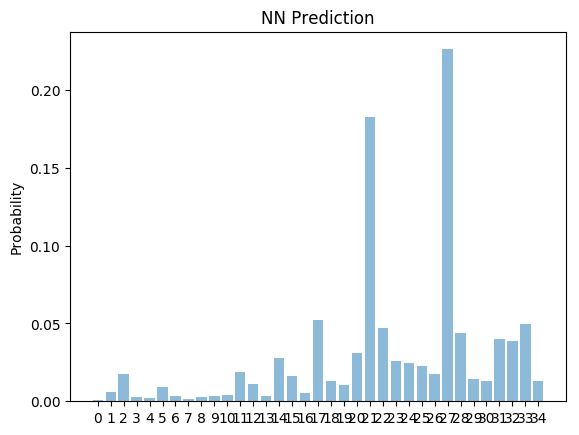

In [14]:
y_pos = np.arange(len(preds[0]))

print(np.min(preds[0]))
objects = list(range(len(preds[0])))

plt.bar(y_pos, preds[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('NN Prediction')

2.8741666e-05


Text(0.5, 1.0, 'Actual')

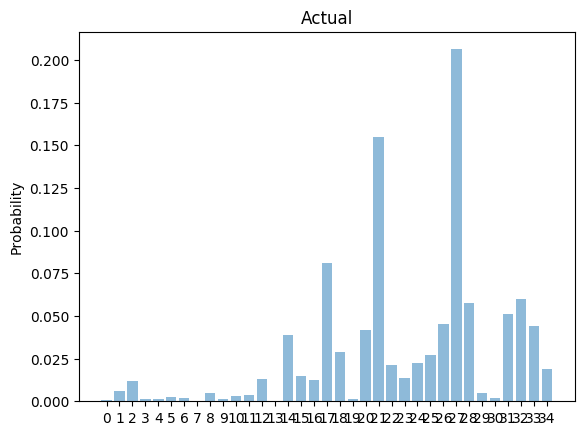

In [15]:
y_pos = np.arange(len(preds[0]))

print(np.min(preds[0]))
objects = list(range(len(preds[0])))

plt.bar(y_pos, y_test[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Actual')